In [88]:
# Get Cases with Mutation on Specific Gene
import requests
import json

In [89]:
def GetRequest(API_Flag,EndPoint,Filters,Fields,Size): # Create API Requests and append them to a list titled 'Requests'
    if API_Flag == 'legacy':
        API_URL = 'https://gdc-api.nci.nih.gov/legacy/'
    else:
        API_URL = 'https://gdc-api.nci.nih.gov'
        
    Request = API_URL + EndPoint + '?' + 'filters=' + Filters + '&' + 'fields=' + Fields + '&' + 'size=' + Size   
    return Request

In [90]:
# Provide Project and Mutation id
Project_id = 'TCGA-BRCA'
Mutation_id = '92b75ae1-8d4d-52c2-8658-9c981eef0e57'

In [91]:
import urllib
import json

JSON =  [{  
    "op":"and",
    "content":[  
      {  
        "op":"=",
        "content":{  
          "field":"cases.project.project_id",
          "value":Project_id
        }
      },
      {  
        "op":"=",
        "content":{  
          "field":"gene.ssm.ssm_id",
          "value":Mutation_id
        }
      }
    ]
},
{  
    "op":"and",
    "content":[  
      {  
        "op":"=",
        "content":{  
          "field":"cases.project.project_id",
          "value":Project_id
        }
      },
      {  
        "op":"excludeifany",
        "content":{  
          "field":"gene.ssm.ssm_id",
          "value":Mutation_id
        }
      }
    ]
  }
]

JSON_String = str(json.dumps(JSON))
Filters = urllib.parse.quote(JSON_String.encode('utf8'))

In [92]:
import pandas as pd
API_Flag = ''
EP = '/analysis/survival'
Fields = 'case_id,submitter_id'
Size = '100000'

In [93]:
# Perform Request
RQ = GetRequest(API_Flag, EP, Filters, Fields, Size)
RQ

'https://gdc-api.nci.nih.gov/analysis/survival?filters=%5B%7B%22op%22%3A%20%22and%22%2C%20%22content%22%3A%20%5B%7B%22op%22%3A%20%22%3D%22%2C%20%22content%22%3A%20%7B%22field%22%3A%20%22cases.project.project_id%22%2C%20%22value%22%3A%20%22TCGA-BRCA%22%7D%7D%2C%20%7B%22op%22%3A%20%22%3D%22%2C%20%22content%22%3A%20%7B%22field%22%3A%20%22gene.ssm.ssm_id%22%2C%20%22value%22%3A%20%2292b75ae1-8d4d-52c2-8658-9c981eef0e57%22%7D%7D%5D%7D%2C%20%7B%22op%22%3A%20%22and%22%2C%20%22content%22%3A%20%5B%7B%22op%22%3A%20%22%3D%22%2C%20%22content%22%3A%20%7B%22field%22%3A%20%22cases.project.project_id%22%2C%20%22value%22%3A%20%22TCGA-BRCA%22%7D%7D%2C%20%7B%22op%22%3A%20%22excludeifany%22%2C%20%22content%22%3A%20%7B%22field%22%3A%20%22gene.ssm.ssm_id%22%2C%20%22value%22%3A%20%2292b75ae1-8d4d-52c2-8658-9c981eef0e57%22%7D%7D%5D%7D%5D&fields=case_id,submitter_id&size=100000'

In [94]:
# Extract Data from Request
r = requests.get(RQ)
data = json.loads(r.text)

With_Mutation = data['results'][0]['donors']
W_O_Mutation = data['results'][1]['donors']

In [95]:
# Create data frames of no mutation / mutation
Mutated = pd.DataFrame(data=With_Mutation)
No_Mutation = pd.DataFrame(data=W_O_Mutation)

In [96]:
Mutated

,censored,id,project_id,submitter_id,survivalEstimate,time
0,True,a991644b-3ee6-4cda-acf0-e37de48a49fc,TCGA-BRCA,TCGA-AN-A03Y,1.000000,10
1,True,2e1e3bf0-1708-4b65-936c-48b89eb8966a,TCGA-BRCA,TCGA-AN-A049,1.000000,19
2,True,80f3f48a-cc21-415c-b181-c77e7ba1c563,TCGA-BRCA,TCGA-A8-A09C,1.000000,31
3,True,281f70c5-876f-44b3-84fb-f2302f85e74c,TCGA-BRCA,TCGA-A8-A06Q,1.000000,31
4,True,c54d5507-bba5-4a1e-8885-3c3b1eed13c1,TCGA-BRCA,TCGA-D8-A27P,1.000000,49
5,True,cd7fb75e-1c2e-4201-86d3-b3ba21f476bf,TCGA-BRCA,TCGA-OK-A5Q2,1.000000,64
6,True,4922cddc-575c-4b8a-8245-ce5f6876760c,TCGA-BRCA,TCGA-E9-A1R3,1.000000,78
7,True,b63391a0-73f8-4544-9e94-f6529245ca2a,TCGA-BRCA,TCGA-E2-A1IL,1.000000,118
8,True,d5cab7f5-e4f1-40ee-a0c8-4c8004c1c9a0,TCGA-BRCA,TCGA-AN-A0FF,1.000000,172
9,True,17c1d42c-cb84-4655-a4cd-b54bae17ecaf,TCGA-BRCA,TCGA-E2-A15K,1.000000,275


In [97]:
No_Mutation

,censored,id,project_id,submitter_id,survivalEstimate,time
0,True,5e4187c9-98f8-4bdb-a8da-6a914e96f47a,TCGA-BRCA,TCGA-A8-A082,1.000000,-31
1,True,389e5b18-8f89-41a9-9fa5-efd4172836e2,TCGA-BRCA,TCGA-PL-A8LV,1.000000,-7
2,True,ce887e90-0660-4f44-a3a4-b3b894cb7eda,TCGA-BRCA,TCGA-C8-A275,1.000000,1
3,True,2b36853f-34d3-47c5-ba6a-e5a93233d2b1,TCGA-BRCA,TCGA-AC-A7VC,1.000000,1
4,True,00a2d166-78c9-4687-a195-3d6315c27574,TCGA-BRCA,TCGA-AN-A0AM,1.000000,5
5,True,a855c228-a263-44df-87a0-cbc32187e3f5,TCGA-BRCA,TCGA-C8-A1HJ,1.000000,5
6,True,fe2cd610-aa52-4789-ac62-7683281bb22f,TCGA-BRCA,TCGA-PL-A8LX,1.000000,5
7,True,316e021c-5175-4ab3-bdb6-2bf9683f657a,TCGA-BRCA,TCGA-AN-A041,1.000000,7
8,True,9ba11ea8-97d3-464a-90a4-ec1151be9088,TCGA-BRCA,TCGA-PL-A8LY,1.000000,8
9,True,cf0e7e4e-b857-4db5-9ae2-551a899f77be,TCGA-BRCA,TCGA-AN-A0XP,1.000000,9


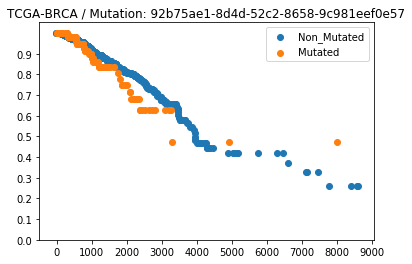

In [98]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(No_Mutation['time'],No_Mutation['survivalEstimate'], label='Non_Mutated')
plt.scatter(Mutated['time'],Mutated['survivalEstimate'], label='Mutated')

plt.xticks(np.arange(0, 10000, 1000))
plt.yticks(np.arange(0, 1, 0.1))

plt.title(Project_id + ' / Mutation: ' + Mutation_id)

plt.legend(loc='upper right');

plt.show()